# Import Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json
import geojson
from urllib.request import urlopen

In [40]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [41]:
# Define path
path = r'/Users/seyda/Desktop/Data Immersion/Achivement 6'

In [42]:
# Import data
df = pd.read_csv(os.path.join(path,'Medical insurance','data','original_data','insurance.csv'))

# Cleaning and checking

In [43]:
df.shape

(1338, 7)

In [44]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [45]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [46]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
# checking mixed type of variables
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

In [48]:
# checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
# checking duplicates
df.duplicated().value_counts()


False    1337
True        1
dtype: int64

In [50]:
df2 = df.drop_duplicates()

In [51]:
df2['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [52]:
# capitalize region content
df2['region'] = df2['region'].str.capitalize()

/var/folders/bh/n6jfclx166j6tybqgxkmvyn80000gn/T/ipykernel_7214/1132548974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['region'] = df2['region'].str.capitalize()


In [53]:
# create a col for smoker_cat
df2.loc[df2['smoker'] == 'yes', 'smoker_cat'] = 1

/var/folders/bh/n6jfclx166j6tybqgxkmvyn80000gn/T/ipykernel_7214/199662511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['smoker'] == 'yes', 'smoker_cat'] = 1


In [54]:
df2.loc[df2['smoker'] == 'no', 'smoker_cat'] = 0

In [55]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,smoker_cat
0,19,female,27.900,0,yes,Southwest,16884.92400,1.0
1,18,male,33.770,1,no,Southeast,1725.55230,0.0
2,28,male,33.000,3,no,Southeast,4449.46200,0.0
3,33,male,22.705,0,no,Northwest,21984.47061,0.0
4,32,male,28.880,0,no,Northwest,3866.85520,0.0


In [56]:
df2.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
smoker_cat    float64
dtype: object

In [57]:
df2['smoker_cat'].astype(int)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker_cat, Length: 1337, dtype: int64

In [58]:
# create a chart for correlation 
df2.corr()

,age,bmi,children,charges,smoker_cat
age,1.000000,0.109344,0.041536,0.298308,-0.025587
bmi,0.109344,1.000000,0.012755,0.198401,0.003746
children,0.041536,0.012755,1.000000,0.067389,0.007331
charges,0.298308,0.198401,0.067389,1.000000,0.787234
smoker_cat,-0.025587,0.003746,0.007331,0.787234,1.000000


# Creating Heatmaps

In [59]:
df3 = df2[['age','bmi','children','smoker_cat','charges']]

/var/folders/bh/n6jfclx166j6tybqgxkmvyn80000gn/T/ipykernel_7214/1401867563.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar() # add a colour legend (called colorbar)


Text(0.5, 1.0, 'Correlation Matrix')

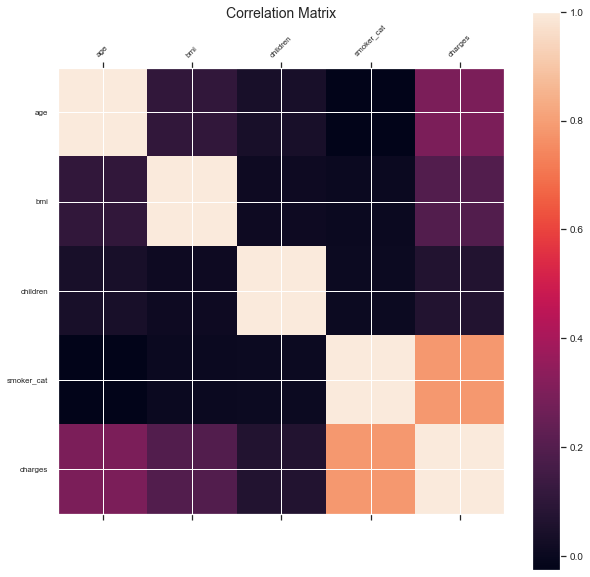

In [60]:
#create heatmap
f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df3.corr(), fignum=f.number) # type of plot
plt.xticks(range(df3.shape[1]), df3.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df3.shape[1]), df3.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Other way to create a heatmap with seaborn

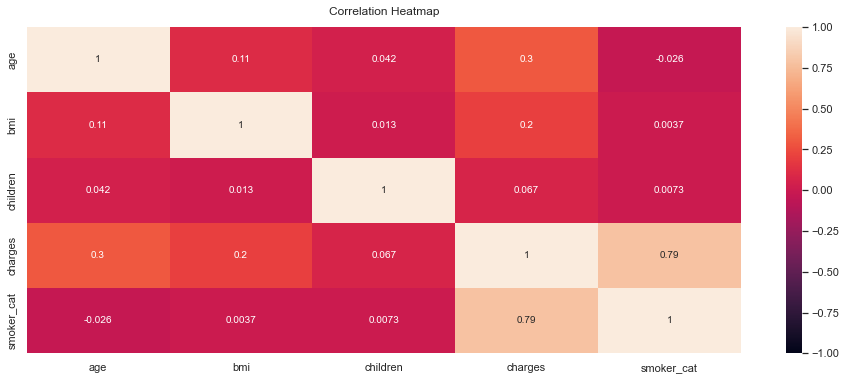

In [61]:
# create the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [64]:
heatmap.figure.savefig(os.path.join(path,'Medical insurance','images & assests','heatmap.png'))

## creating a heatmap counting the objects in the chart by using "get_dummies" command

In [24]:
# prepare data for heatmao
df_new = pd.get_dummies(df2, columns=['sex', 'region', 'children', 'smoker'])

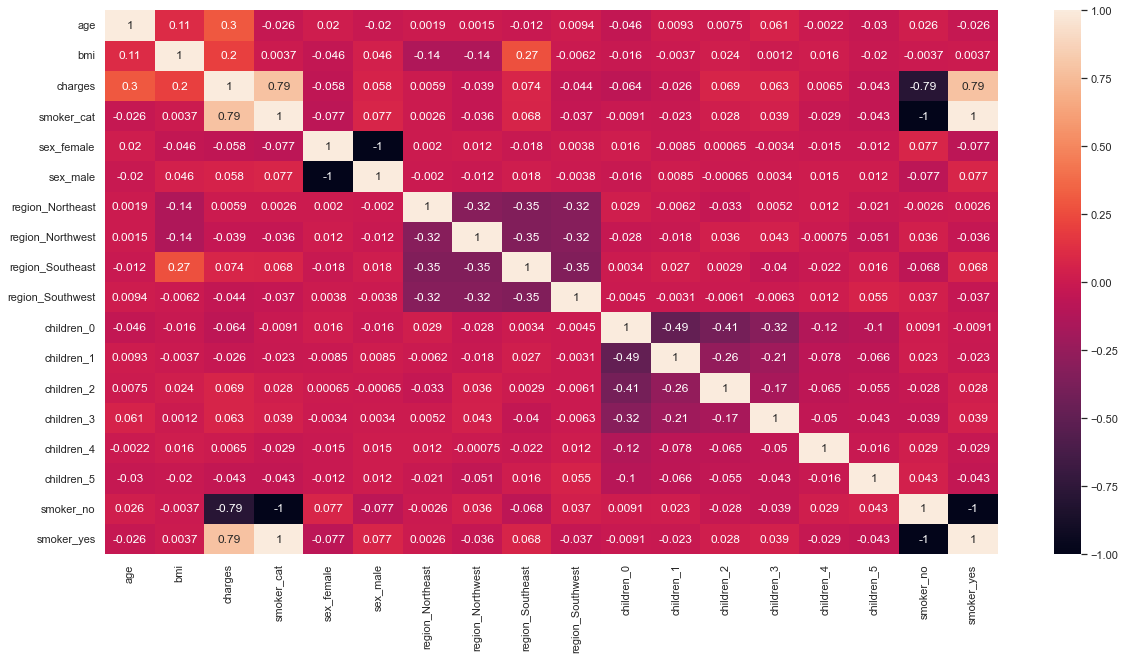

In [25]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(df_new.corr(), annot=True);

- There is a high correlation between insurance charge and smokers.

# Scatterplots

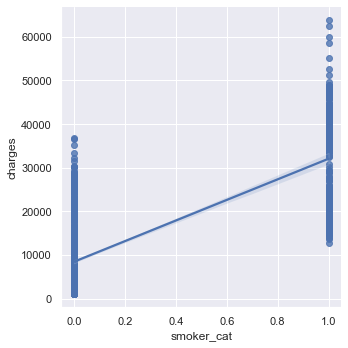

In [26]:
# Create a scatterplot for the "smokers" and "charges" columns in seaborn

sns.lmplot(x = 'smoker_cat', y = 'charges', data = df2)

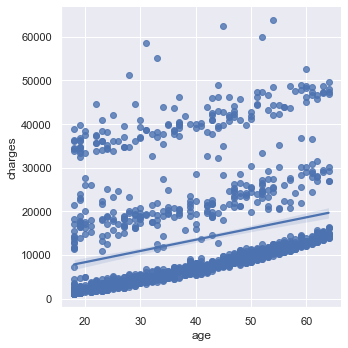

In [27]:
# Create a scatterplot for the "age" and "charges" columns in seaborn

sns.lmplot(x = 'age', y = 'charges', data = df2)

# Pairplots

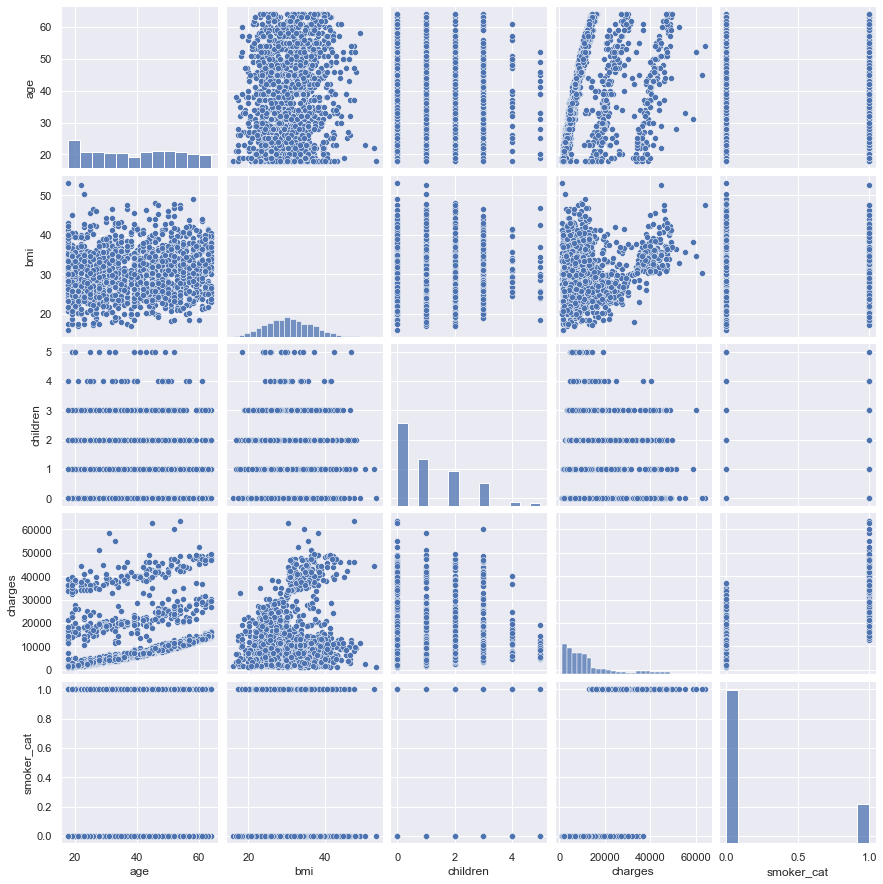

In [28]:
g = sns.pairplot(df2)

# Categorical plots

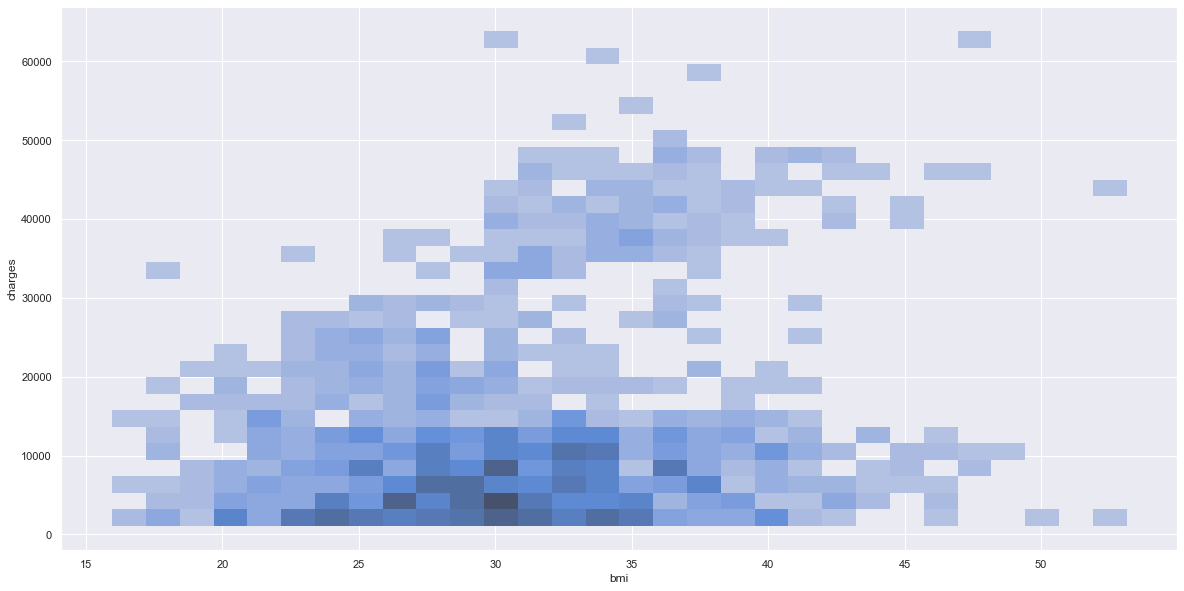

In [29]:
h = sns.histplot(x='bmi',y='charges', data = df2,bins = 30, kde = True)

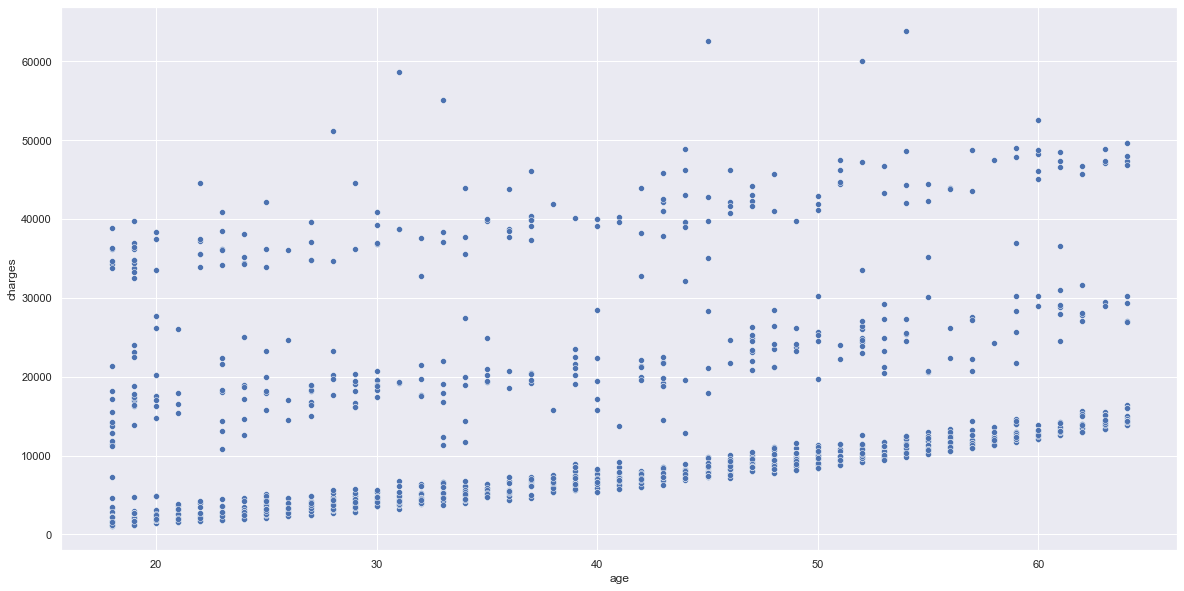

In [30]:
h2 = sns.scatterplot( x = 'age', y = 'charges', data = df2)

# Creating a choropleth map



In [31]:
# store the URL in url as 
# parameter for urlopen
url = "https://raw.githubusercontent.com/DanaDaskalova/geoJSONs/main/geoJSON_us_regions"
# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())

In [32]:
# search for region columns value
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df3 = pd.DataFrame(df2, columns = ['region','charges'])

In [34]:
# it seem json file and the data doesn't match in the region columns
# json data has 'Midwest','Northeast','South' and 'West'
# Change their name to json file region names
df3['region'] = df3['region'].replace(['Southwest','Southeast','Northwest'],['West','South','West'])


In [35]:
df4 = df3.groupby('region')['charges'].sum()
print(df4)

region
Northeast    4.343669e+06
South        5.363690e+06
West         8.046827e+06
Name: charges, dtype: float64


In [36]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data_json, 
    data = df4,
    columns = ['region', 'charges'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "charges").add_to(map)
folium.LayerControl().add_to(map)

map

## - I was wondering medical costs distribution on the regions. West part of the country is charged more than other regions.
## - Through this exercise, I see that smoking, age, and bmi affects the medical cost.


## - I would like to test this hypothesis. 

# Export data

In [37]:
df2.to_csv(os.path.join(path,'Medical insurance','data','prepared_data',''))

IsADirectoryError: [Errno 21] Is a directory: '/Users/seyda/Desktop/Data Immersion/Achivement 6/Medical insurance/data/prepared_data/'